In [30]:
from dolfin import *
import mshr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

First create a simple FEM mesh of a circle:

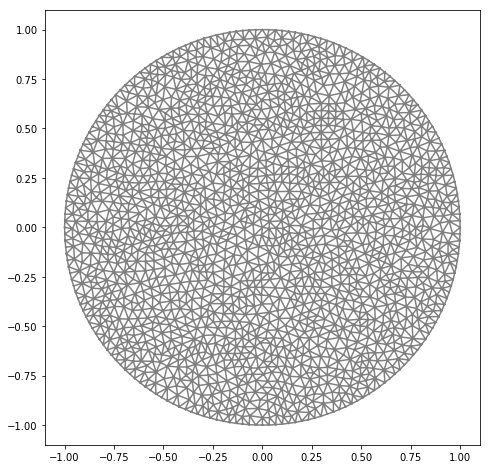

In [41]:
n=30
geometry=mshr.Circle(Point(0.0,0.0),1.0)
mesh = mshr.generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)

Lets compute the eigenfunctions on this circle, and then deform it by stretching in the x-axis to form longer and longer elipses. Here we can see how the domain geometry affects the form of the eigenfunctions:

Discrete space size: 1862
100.297924604 0.0
Discrete space size: 1862
82.012295418 0.0
Discrete space size: 1862
68.8956095287 0.0
Discrete space size: 1862
60.4060508791 0.0
Discrete space size: 1862
50.4901394805 0.0


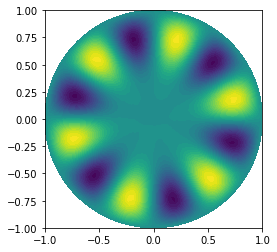

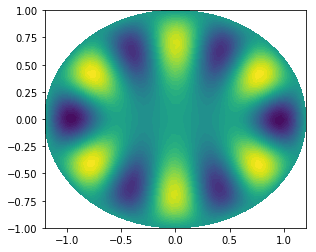

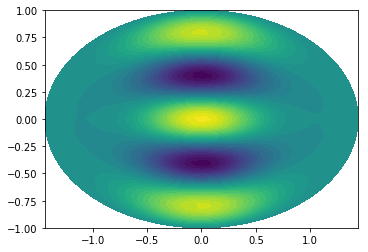

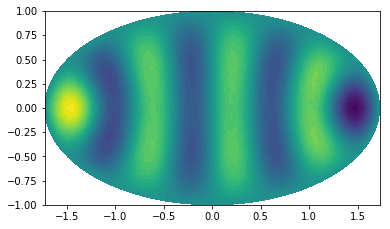

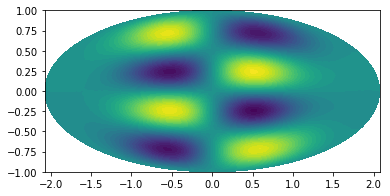

In [42]:
k = 19 #Which eigenfuncion should we plot, in order of smallest magnitude eigenvalue
ns = 5 #Number of times to stretch the circle

for i in range(ns):
    V = FunctionSpace(mesh, 'Lagrange', 1)
    bc = DirichletBC(V, 0.0, DomainBoundary())
    u, v = TrialFunction(V), TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = Constant(0.0)*v*dx
    m = u*v*dx

    A, _ = assemble_system(a, L, bc)
    B = assemble(m)

    print "Discrete space size: %d"%V.dim()
    eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
    #prm = eigensolver.parameters
    #info(prm, True)
    eigensolver.parameters['spectrum'] = 'smallest magnitude'

    eigensolver.solve(20)
    eig = Function(V)
    eig_vec = eig.vector()
    
    r, c, rx, cx = eigensolver.get_eigenpair(k)
    eig_vec[:] = rx
    print r, c
    plt.figure()
    plot(eig)
    
    
    # Stretch the domain by 20% in x-axis
    mesh.coordinates()[:,0] *= 1.2